### ✔️회귀 (Regression)
- 수치형 예측
- 선형회귀 (LinearRegression) : 독립변수와 종속변수 선형관계

In [1]:
# load module
from sklearn.linear_model import LinearRegression
import pandas as pd

In [9]:
# Prepare data
score = [49, 62, 74, 82, 96, 100]
hour = [1, 2, 3, 4, 5, 6]

dataDF = pd.DataFrame({'score':score, 'hour':hour})

In [10]:
dataDF.head(2)

,score,hour
0,49,1
1,62,2


### ✔️목표 : 시간에 따른 점수 예측
- Data Feature   : hour
- Target Feature : score

📌 check relationship between hour and score

In [11]:
import matplotlib.pyplot as plt

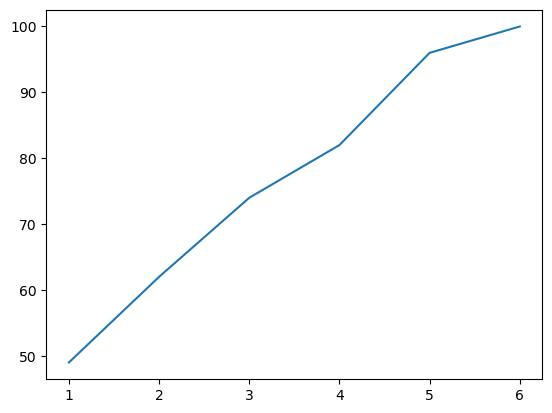

In [18]:
# Visualization
plt.plot(dataDF.hour, dataDF.score)
plt.show()

In [16]:
# Correlation Coefficient
dataDF.corr()

,score,hour
score,1.000000,0.992308
hour,0.992308,1.000000


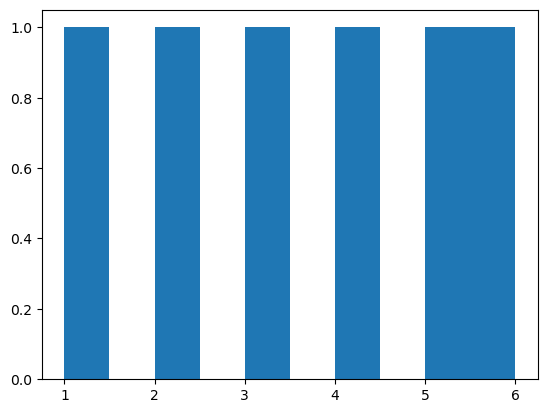

In [31]:
plt.hist(dataDF.hour)
plt.show()

### ✔️학습 방법 선정
- 독립 & 종속 변수 관계 확인
- 데이터 + 라벨 => 지도학습
- 점수 예측 => 회귀(Regression)

In [32]:
# (1) Create model object
model = LinearRegression()

In [35]:
# (2) Training ---- train data
# Must be 2-dimension array
X = dataDF.hour.to_numpy().reshape(-1, 1)
y = dataDF.score

In [37]:
X.shape, y.shape

((6, 1), (6,))

In [38]:
model.fit(X, y)

LinearRegression()

In [39]:
# (3) Regression Coefficient
model.coef_, model.intercept_

(array([10.42857143]), 40.666666666666664)

📌 $ score = 40.667 + 10.429 * hour $

In [43]:
# (4) prediction => predict( 2D )
y_pred = model.predict(X)
y_pred

array([ 51.0952381 ,  61.52380952,  71.95238095,  82.38095238,
        92.80952381, 103.23809524])

In [41]:
model.score(X, y)

0.9846758398107885

📌 $ R^2 = 0.985$

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y, y_pred)

4.936507936507915

### ✔️ 목표 : 시간과 과외 횟수에 따른 점수 예측
- 과외 횟수 컬럼 추가
- 데이터 변수 : hour, 과외 횟수
- Target variable : score
- Linear Regression : score = hour * coef_1 + 과외 횟수 * coef_2 + intercept_

In [50]:
# Prepare data
score = [49, 62, 74, 82, 96, 100]
hour = [1, 2, 3, 4, 5, 6]
cnt = [0, 0, 1, 2, 2, 1]

dataDF = pd.DataFrame({'score':score, 'cnt':cnt, 'hour':hour})

In [51]:
dataDF.head(2)

,score,cnt,hour
0,49,0,1
1,62,0,2


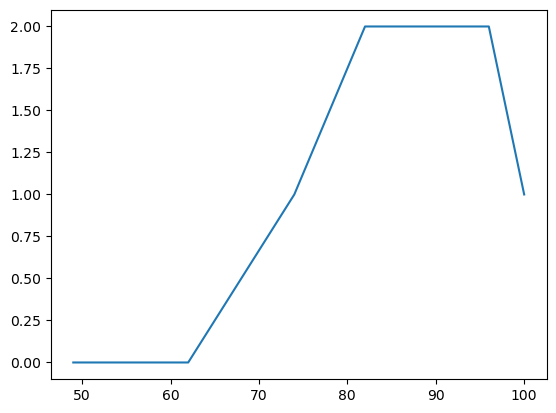

In [65]:
# Independent variable - Dependent variable relationship
plt.plot(dataDF.score, dataDF.cnt)
plt.show()

In [55]:
# Correlation Coefficient
dataDF.corr()

,score,cnt,hour
score,1.000000,0.761987,0.992308
cnt,0.761987,1.000000,0.717137
hour,0.992308,0.717137,1.000000


In [66]:
# Multiple Linear Regression

model2 = LinearRegression()

In [59]:
X = dataDF[['cnt', 'hour']]

In [60]:
X.shape

(6, 2)

In [61]:
y = dataDF.score

In [62]:
model2.fit(X, y)

LinearRegression()

In [64]:
# Regression coefficient
model2.coef_, model2.intercept_

(array([2.27941176, 9.64705882]), 41.12254901960786)

📌 $ score = 41.123 + 2.279 * cnt + 9.647 * hour $